# White Wine Data Analysis   

Download Link : https://archive.ics.uci.edu/ml/datasets/wine+quality  

Citation : P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Since there are no null entries, we don't need to deal with missing values. 

### Descriptive Statistics

In [5]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Analysis over Red Wine

### Let's first check the Quality Column

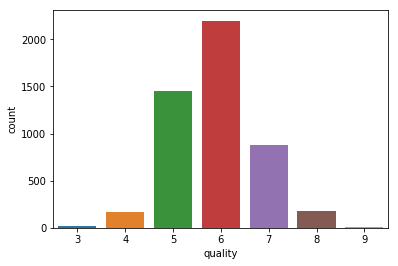

In [6]:
sns.countplot(white_wine_df['quality'])

### Lets check which of the other columns are highly correlated to Quality

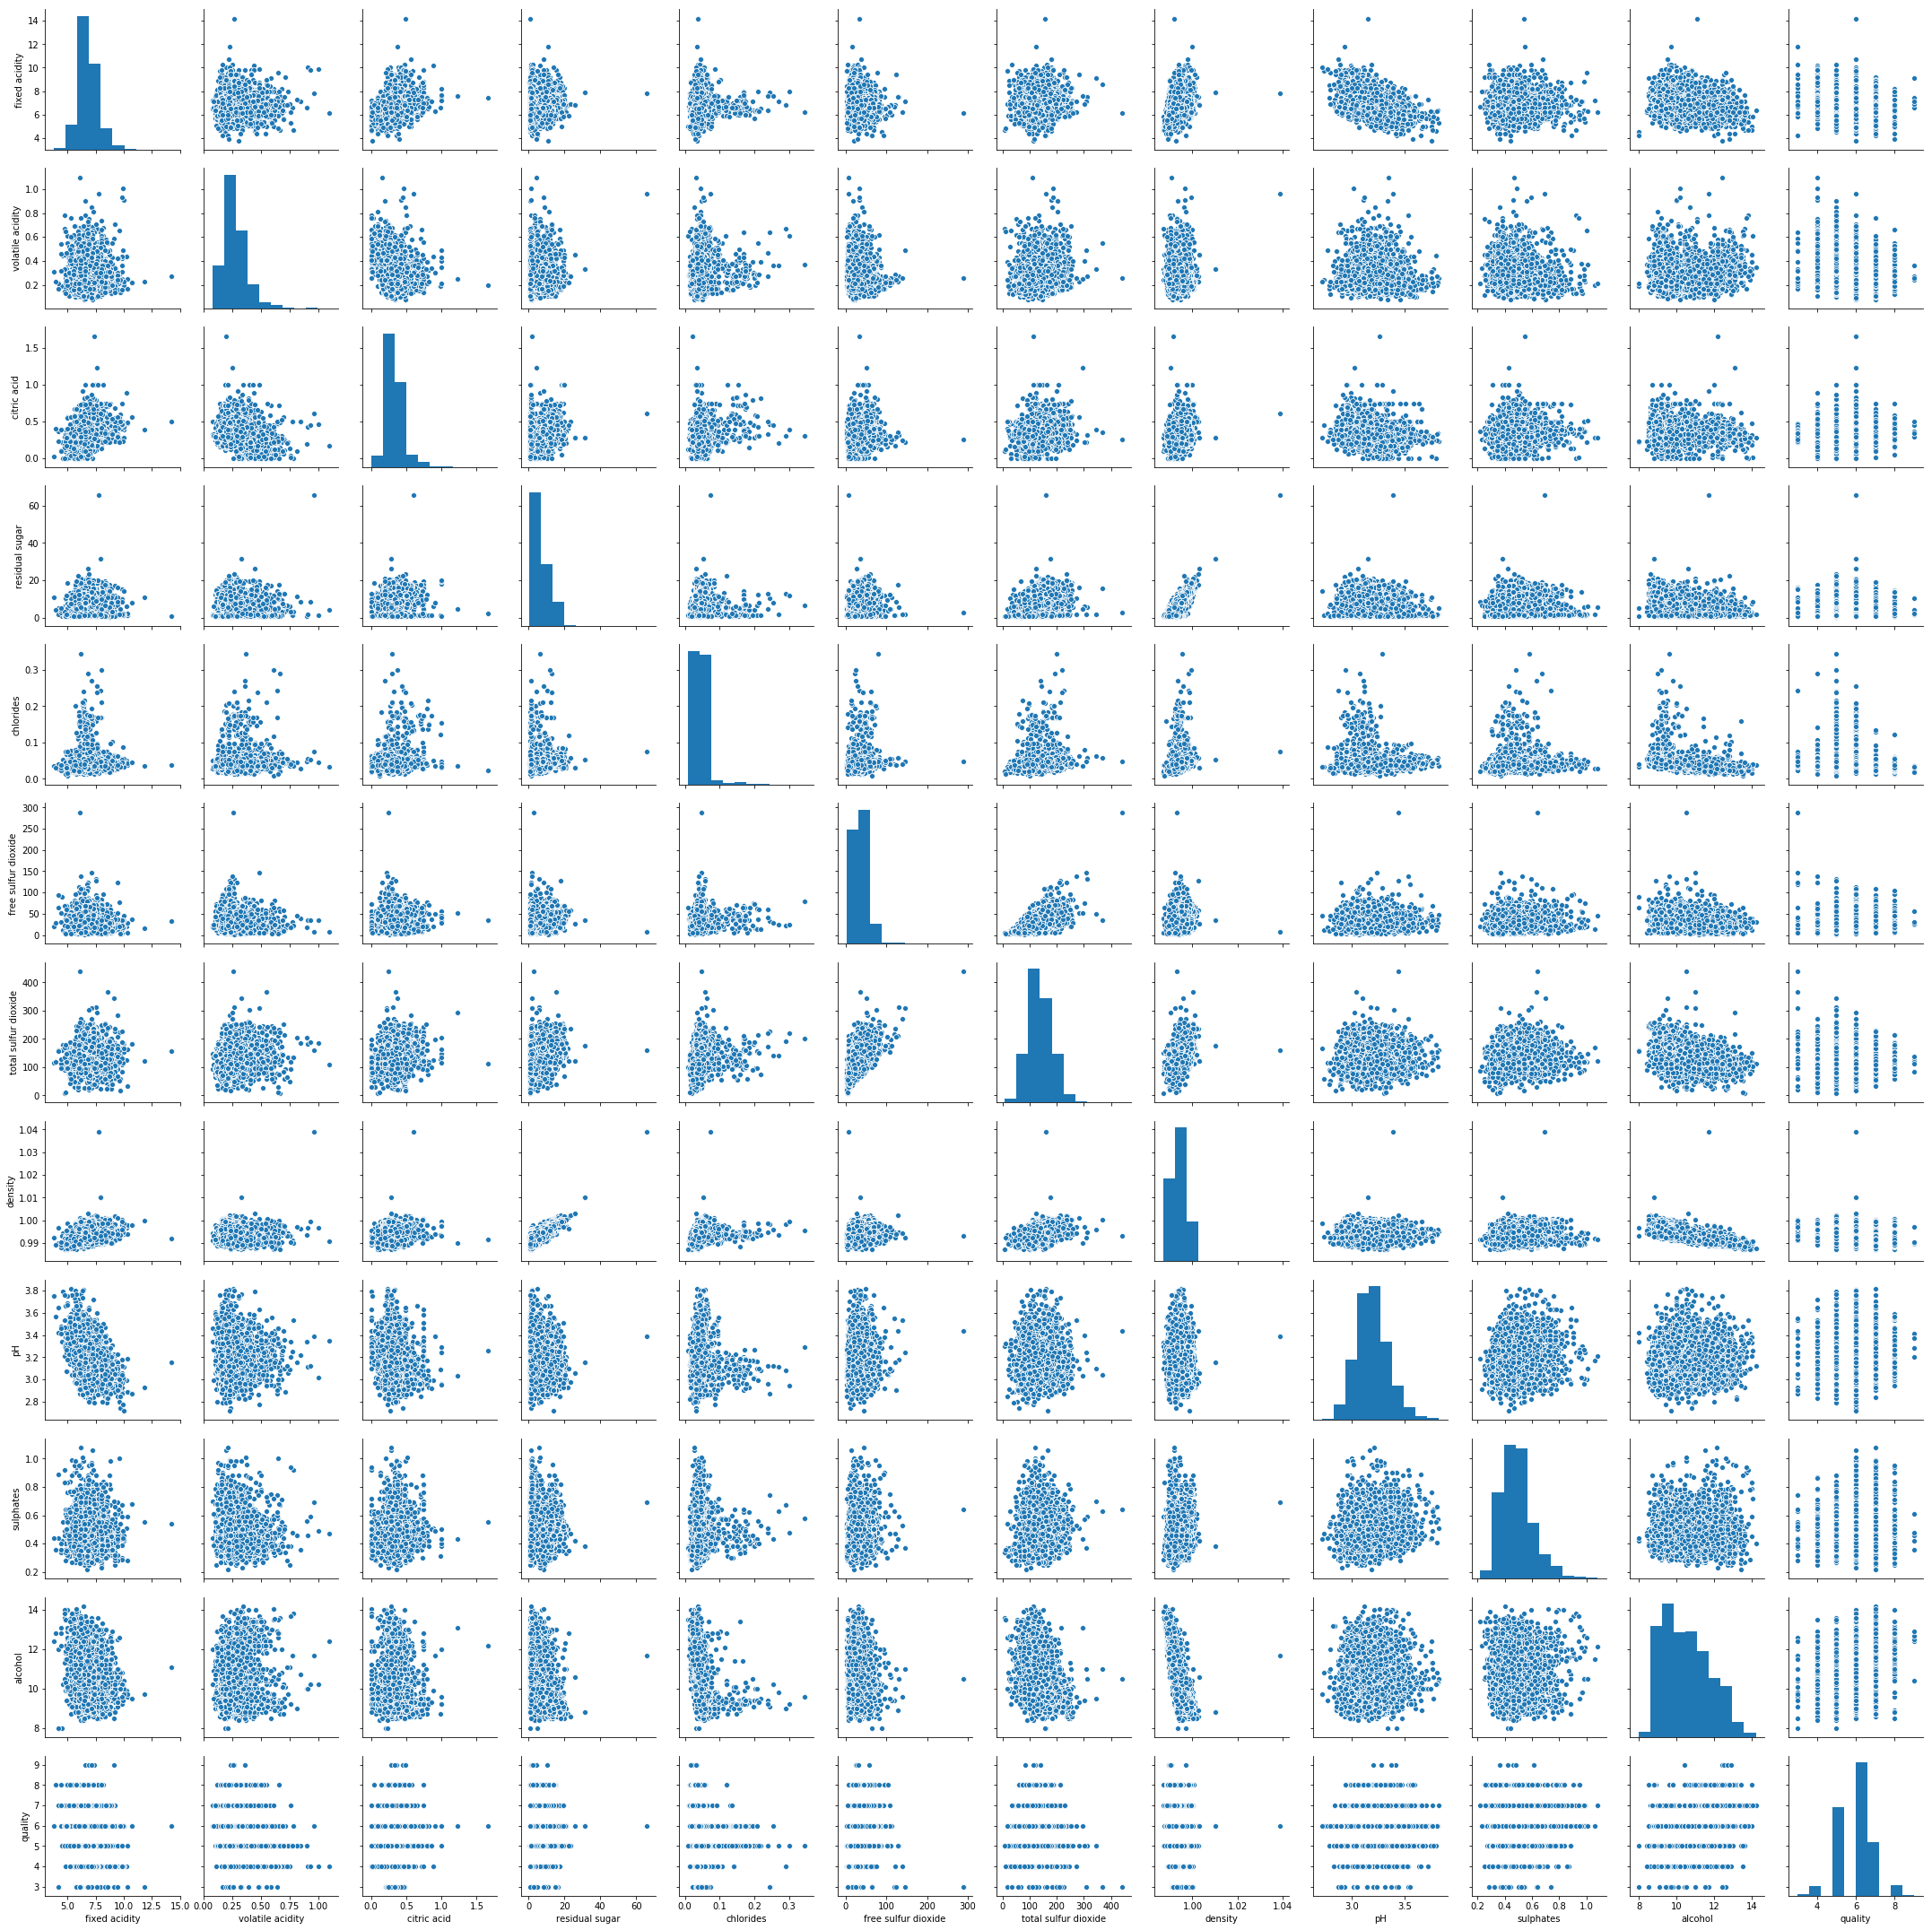

In [7]:
sns.pairplot(white_wine_df)

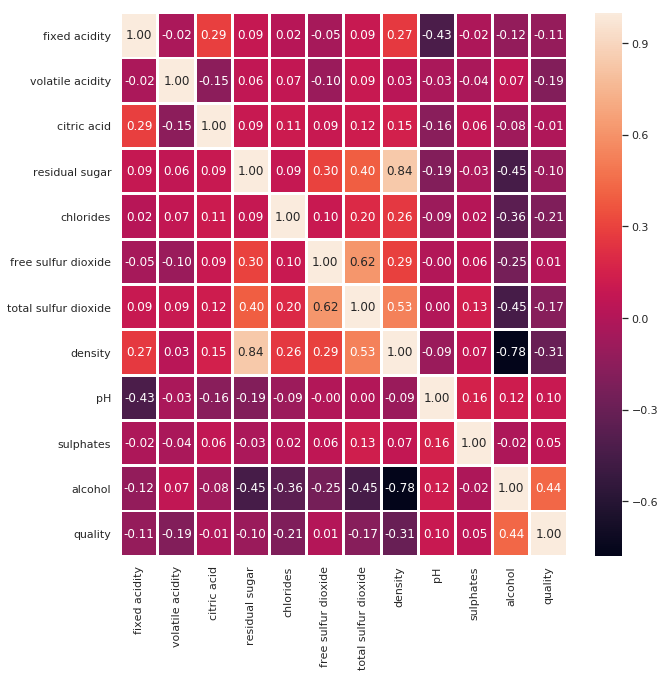

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(white_wine_df.corr(), annot=True, fmt='.2f', linewidth=2)

- Free Suplhur Dioxide and Total Sulphur Dioxide have some positive relation to Residual Sugar. On further inspection, I found that the quantity of SO2 is dependent on Sugar content. Reference : http://thewinehub.com/home/2013/01/09/the-use-or-not-of-sulfur-dioxide-in-winemaking-trick-or-treat/ . More specifically, the mentioned link states that "the lower the Residual Sugar , the less SO2 needed"  
- cholrides, density and volatile acidity have weak -ve correlation with qualtiy
- alcohol has +ve correlation with quality


/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


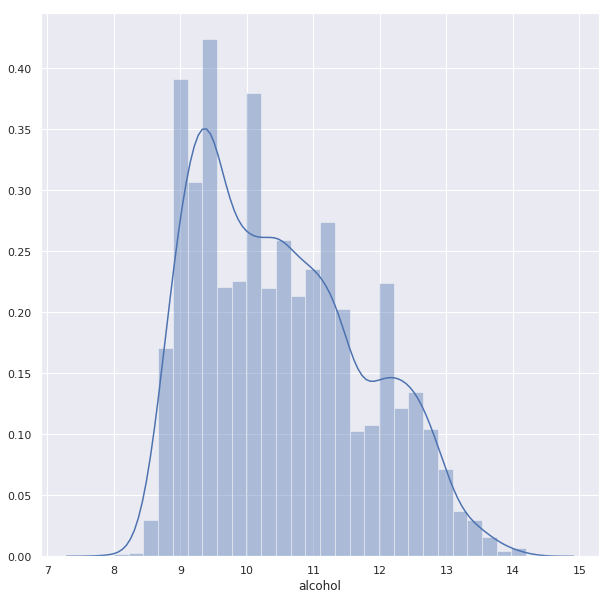

In [9]:
sns.distplot(white_wine_df['alcohol'])

In [10]:
from scipy.stats import skew
skew(white_wine_df['alcohol'])

0.48719273327634327

### Alcohol content is positively skewed

In [11]:
def draw_hist(temp_df, bin_size = 15):
    ax = sns.distplot(temp_df)
    #xmin, xmax = ax.get_xlim()
    #ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()
    print("Skewness is {}".format(skew(temp_df)))
    print("Mean is {}".format(np.median(temp_df)))
    print("Median is {}".format(np.mean(temp_df)))

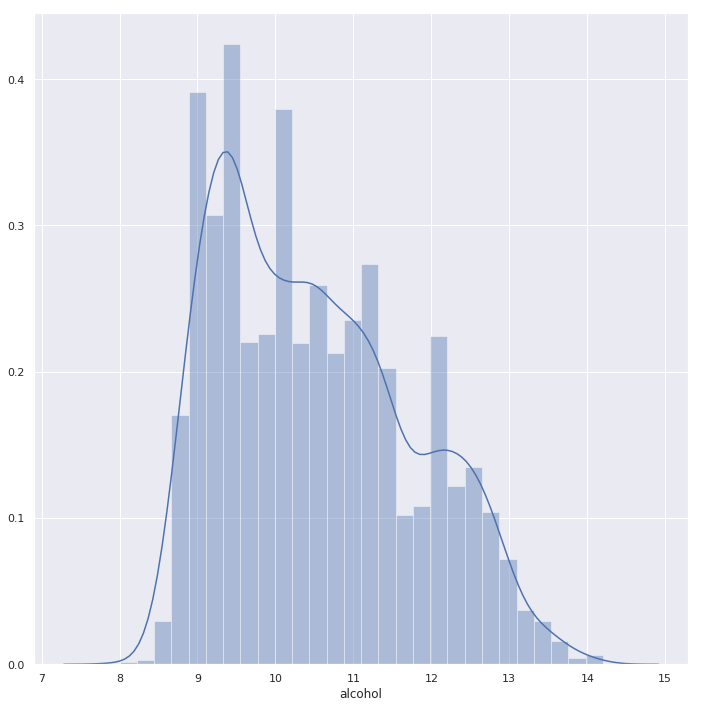

Skewness is 0.48719273327634327
Mean is 10.4
Median is 10.514267047774638


In [12]:
draw_hist(white_wine_df['alcohol'])

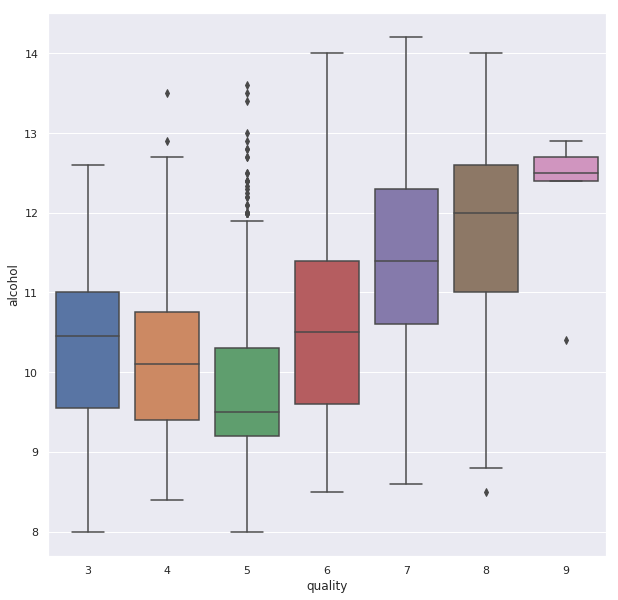

In [13]:
sns.boxplot(x='quality', y='alcohol', data=white_wine_df)

In [14]:
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [15]:
get_corr('alcohol', 'pH', white_wine_df)

Correlation between alcohol and pH is 0.12143209874912937
P-value of this correlation is 1.4900595881888563e-17


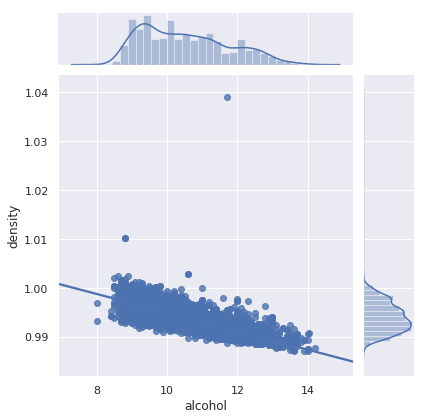

In [16]:
joint_plt = sns.jointplot(x='alcohol', y='density', data=white_wine_df,
                        kind='reg')

In [17]:
get_corr('alcohol', 'density', white_wine_df)

Correlation between alcohol and density is -0.7801376214255578
P-value of this correlation is 0.0


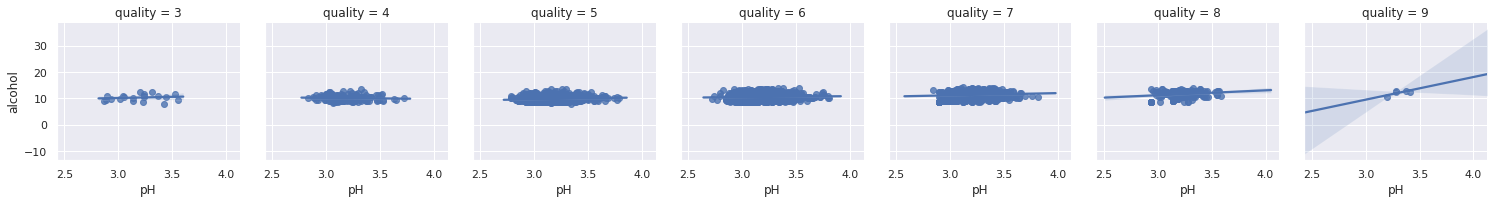

In [18]:
g = sns.FacetGrid(white_wine_df, col="quality")
g = g.map(sns.regplot, "pH", "alcohol")

### Lets analyze sulphates and quality

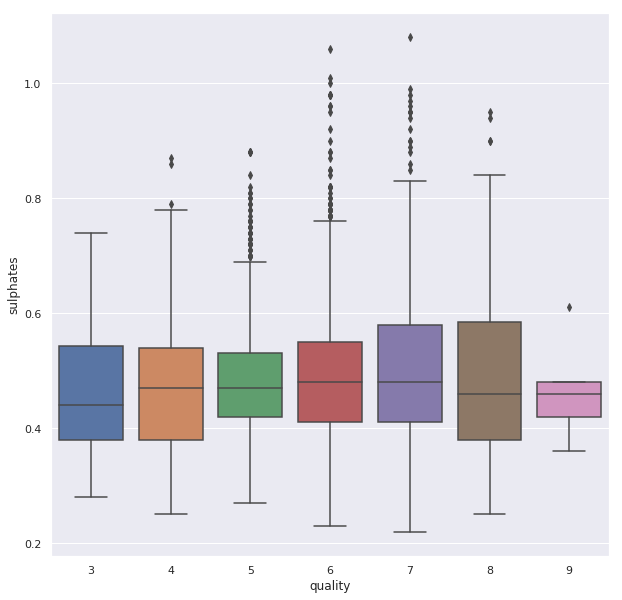

In [19]:
sns.boxplot(x='quality', y='sulphates', data=white_wine_df)

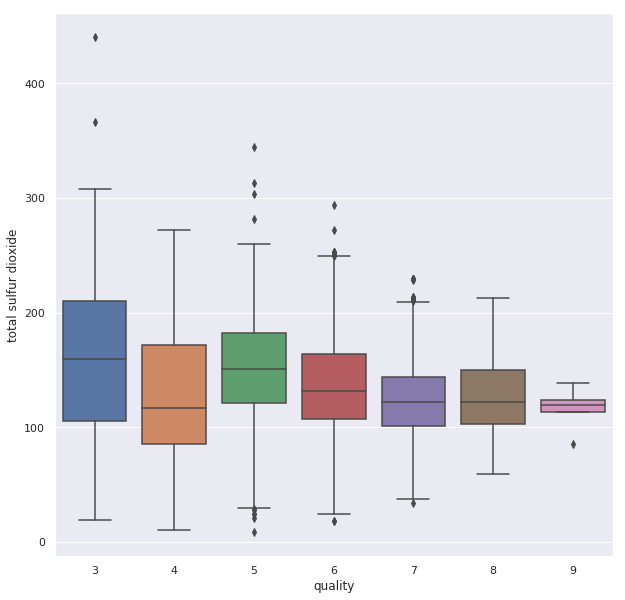

In [20]:
sns.boxplot(x='quality', y='total sulfur dioxide', data=white_wine_df)

In [21]:
get_corr('total sulfur dioxide', 'quality', white_wine_df)

Correlation between total sulfur dioxide and quality is -0.17473721759706287
P-value of this correlation is 6.99189812423953e-35


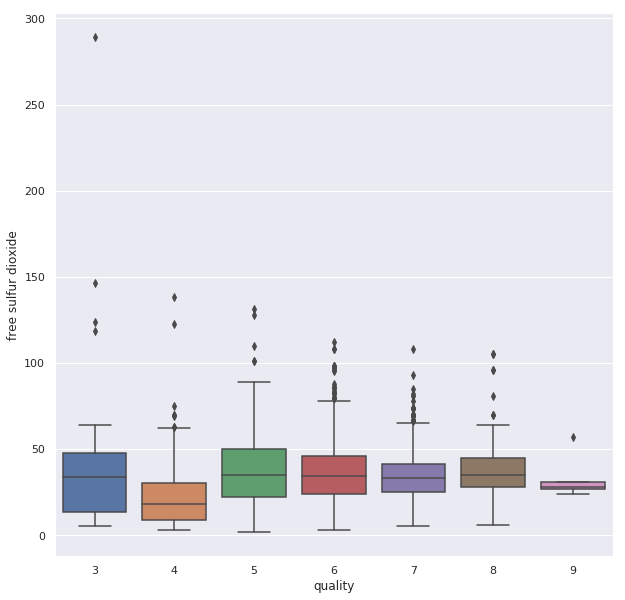

In [22]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=white_wine_df)

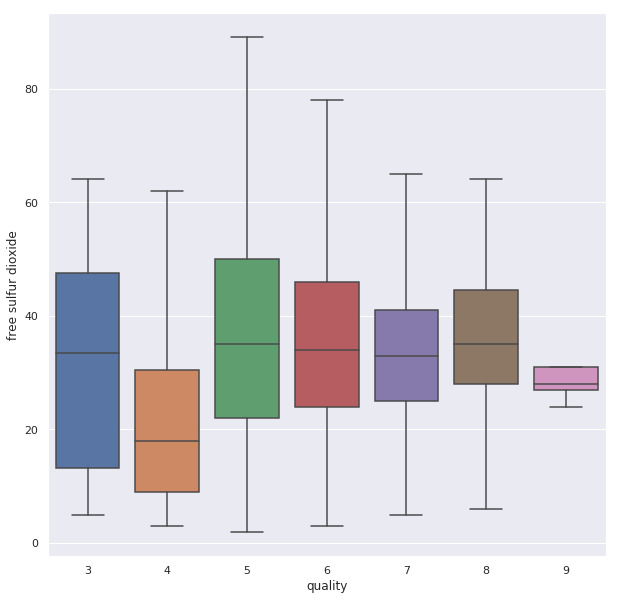

In [23]:
sns.boxplot(x='quality', y='free sulfur dioxide', 
            data=white_wine_df, showfliers=False)

In [24]:
get_corr('free sulfur dioxide', 'quality', white_wine_df)

Correlation between free sulfur dioxide and quality is 0.008158067123436084
P-value of this correlation is 0.5681271459233304


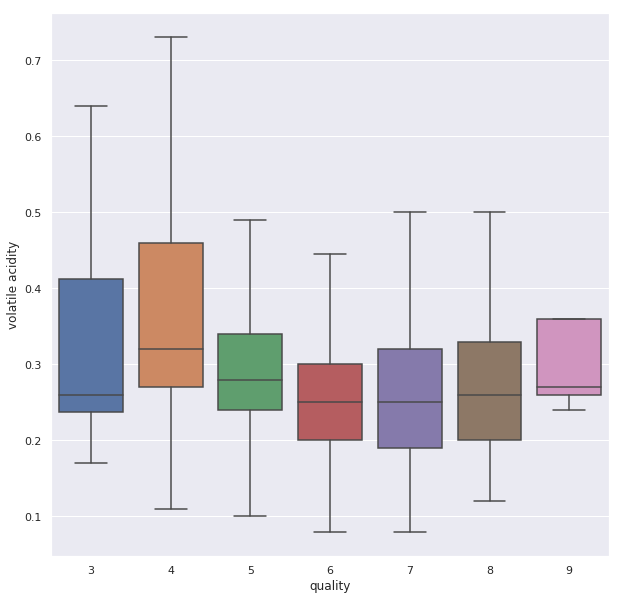

In [25]:
sns.boxplot(x='quality', y='volatile acidity', 
            data=white_wine_df, showfliers=False)

In [26]:
get_corr('volatile acidity', 'quality', white_wine_df)

Correlation between volatile acidity and quality is -0.1947229689211343
P-value of this correlation is 4.673261270691134e-43


# Relation between columns besides Quality

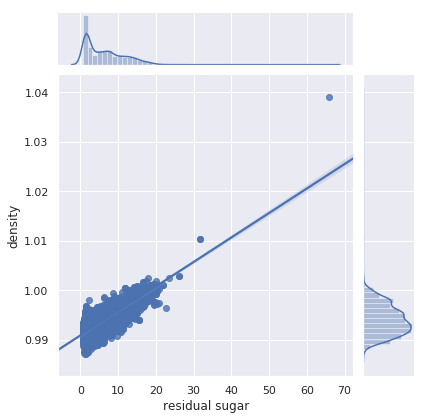

In [27]:
joint_plt = sns.jointplot(x='residual sugar', y='density', data=white_wine_df,
                        kind='reg')

/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


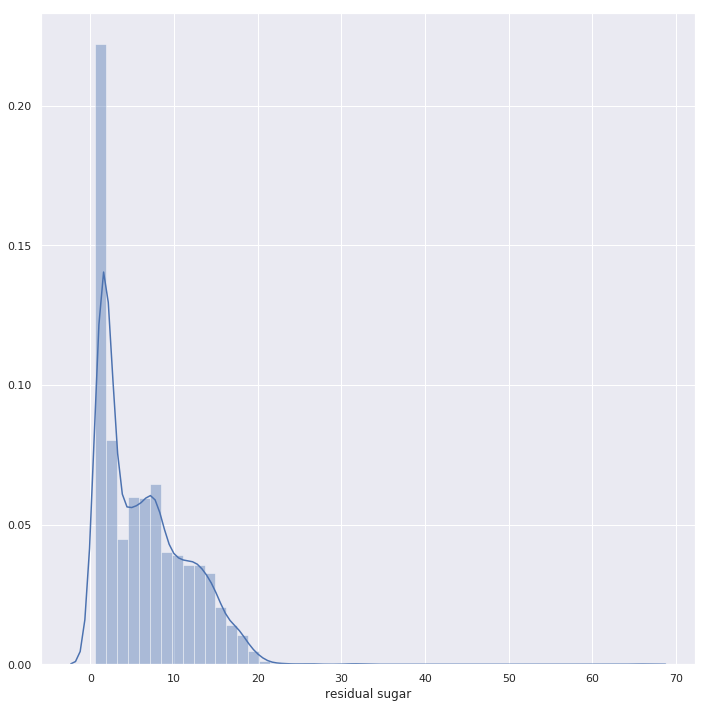

Skewness is 1.0767638711454448
Mean is 5.2
Median is 6.391414863209486


In [37]:
draw_hist(white_wine_df['residual sugar'])

# Create a new column total acidity

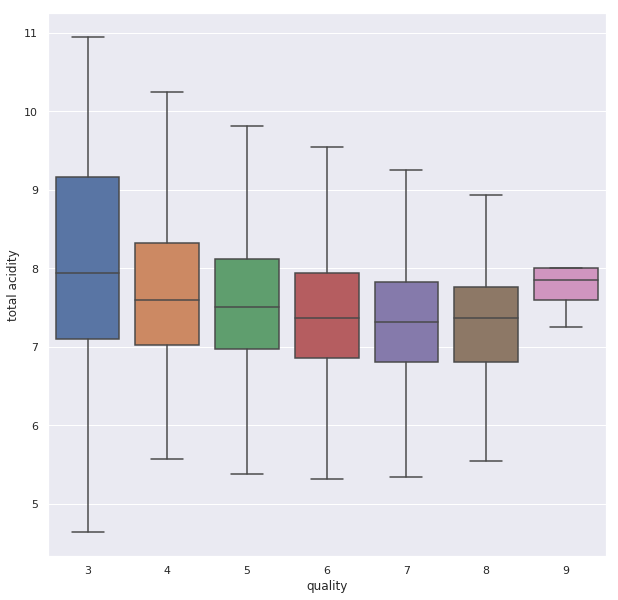

In [46]:
white_wine_df['total acidity'] = (white_wine_df['fixed acidity']+ white_wine_df['citric acid'] + white_wine_df['volatile acidity'])
sns.boxplot(x='quality', y='total acidity', data=white_wine_df,
           showfliers=False)

## Lets move on to citric acid

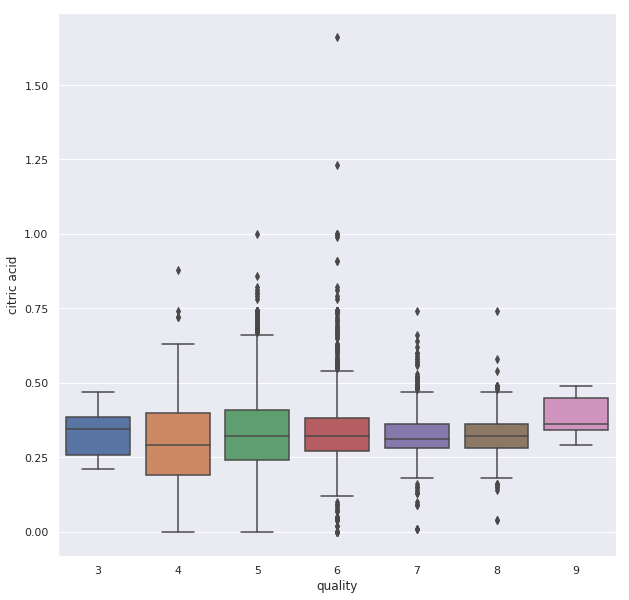

In [41]:
sns.boxplot(x='quality', y='citric acid', data=white_wine_df)

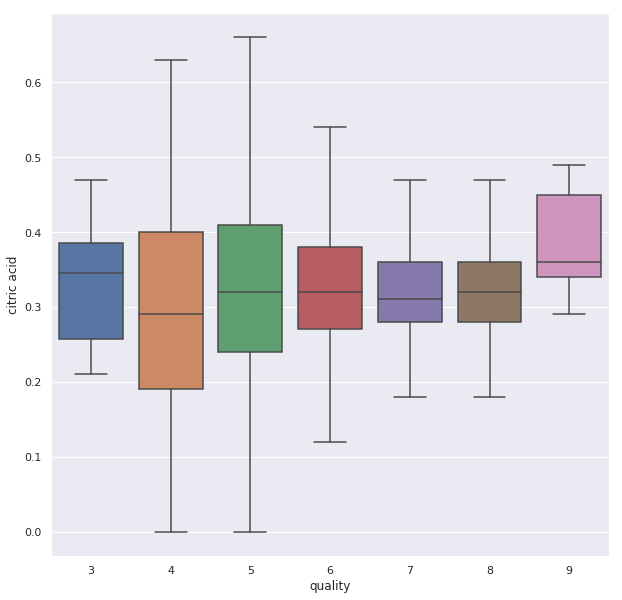

In [42]:
sns.boxplot(x='quality', y='citric acid', data=white_wine_df,
           showfliers=False)

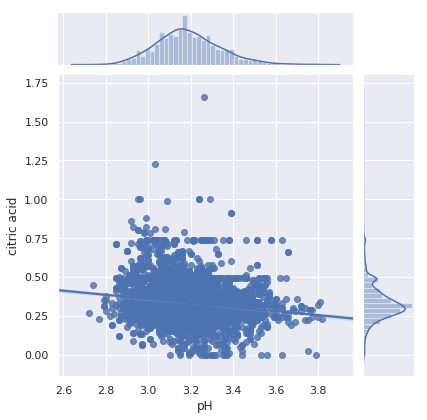

In [31]:
sns.jointplot(x='pH', y='citric acid', data=white_wine_df, kind='reg')

In [32]:
get_corr('pH', 'citric acid', white_wine_df)

Correlation between pH and citric acid is -0.1637482114006237
P-value of this correlation is 8.783728611476236e-31


### Finally lets check Relation between Residual Sugar and Quality

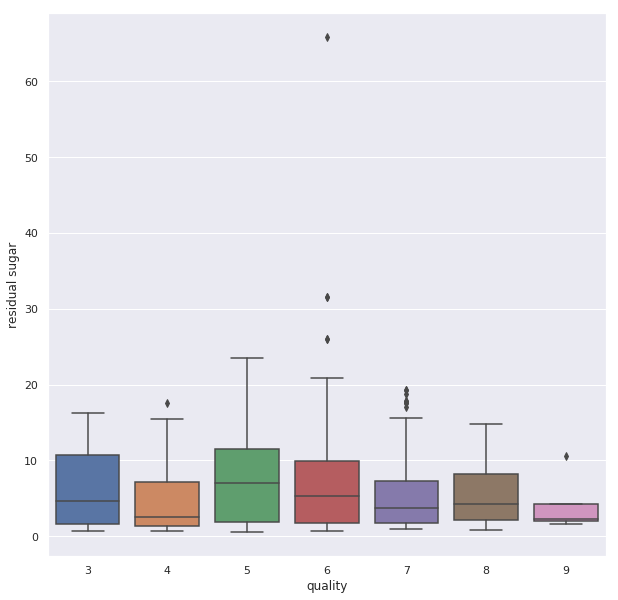

In [43]:
sns.boxplot(x='quality', y='residual sugar', data=white_wine_df)

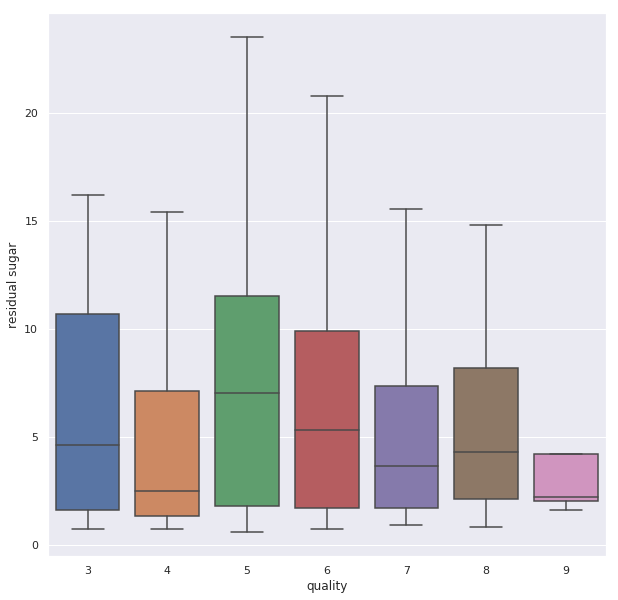

In [44]:
sns.boxplot(x='quality', y='residual sugar', data=white_wine_df,
           showfliers=False)

### Reference : https://vinepair.com/articles/what-is-a-crisp-wine/

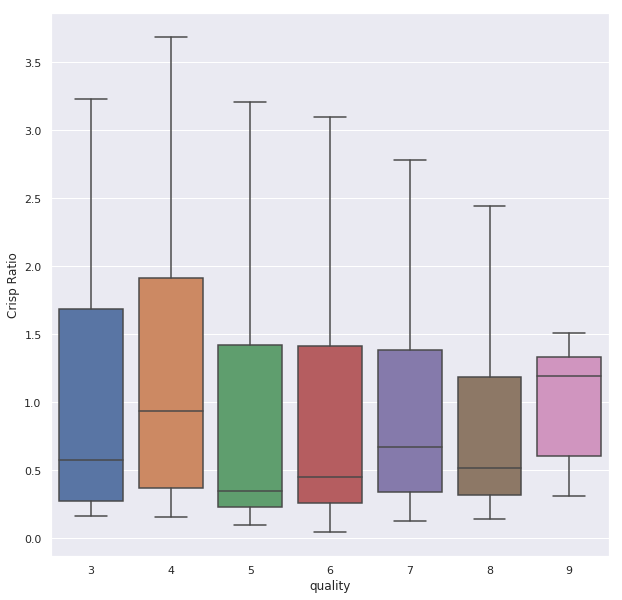

In [48]:
white_wine_df['Crisp Ratio']  = white_wine_df['total acidity']/white_wine_df['residual sugar']
sns.boxplot(x='quality', y='Crisp Ratio', data=white_wine_df,
           showfliers=False)